In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('train.csv')
data.drop(columns=['Var_1'],inplace=True)
data.drop(columns=['ID'],inplace=True)

In [67]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,D
2,0,1,67,1,Engineer,1.0,0,1.0,B
3,1,1,67,1,Lawyer,0.0,2,2.0,B
5,1,1,56,0,Artist,0.0,1,2.0,C
6,1,0,32,1,Healthcare,1.0,0,3.0,C


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work_Experience'}>],
       [<AxesSubplot:title={'center':'Family_Size'}>, <AxesSubplot:>]],
      dtype=object)

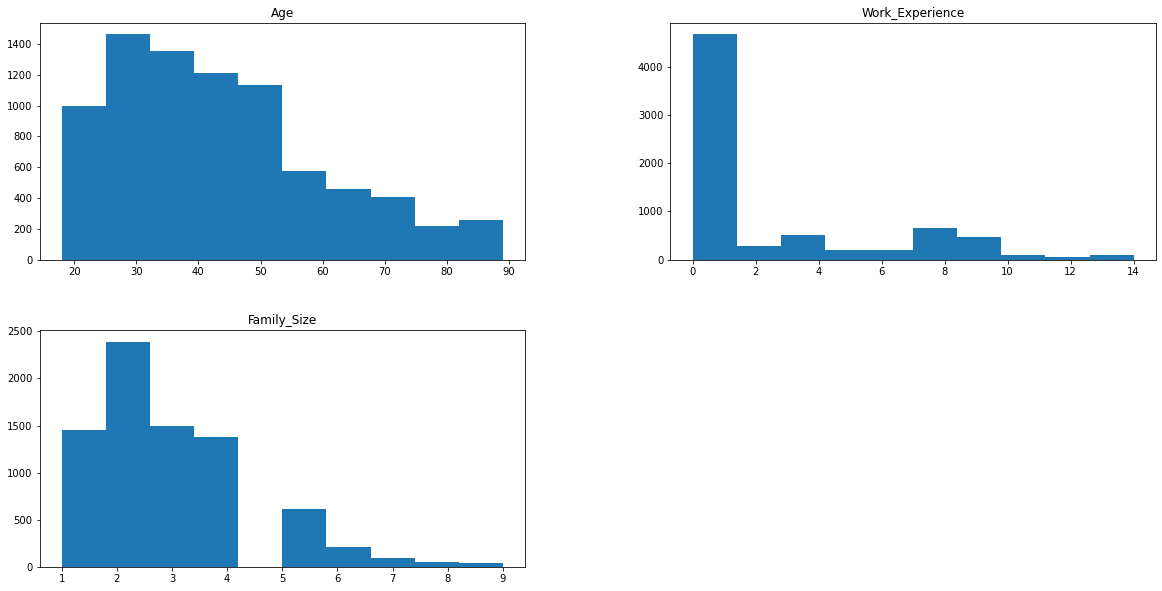

In [3]:
data.hist(column=['Age','Work_Experience','Family_Size'],grid=False,figsize=(20,10))

In [4]:
#Drop All rows having any missing value
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


In [6]:
#Convert Data to have ordinal encoding for pending_score 
mapping = {"Low":0,"Average":1,"High":2,"Yes":1,"No":0,"Male":1,"Female":0}
columnsToChange = ['Spending_Score','Gender','Ever_Married','Graduated']

for column in columnsToChange:
    data[column]= data[column].apply(lambda x:mapping[x])

In [7]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,D
2,0,1,67,1,Engineer,1.0,0,1.0,B
3,1,1,67,1,Lawyer,0.0,2,2.0,B
5,1,1,56,0,Artist,0.0,1,2.0,C
6,1,0,32,1,Healthcare,1.0,0,3.0,C


In [8]:
X = data.drop(columns=['Segmentation'])
Y = data['Segmentation'] 

In [9]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,Healthcare,1.0,0,4.0
2,0,1,67,1,Engineer,1.0,0,1.0
3,1,1,67,1,Lawyer,0.0,2,2.0
5,1,1,56,0,Artist,0.0,1,2.0
6,1,0,32,1,Healthcare,1.0,0,3.0


In [10]:
#Perform One-Hot encoding 
# columnsToChange = ["Gender","Ever_Married","Graduated","Profession"]
X = pd.get_dummies(X,columns=["Profession"],prefix="Profession")

In [56]:
#Define Functions to be Used

def train_using_gini(X_train,y_train,depth=20):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 42,max_depth=depth)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
#     print("Confusion Matrix: ",
#         confusion_matrix(y_test, y_pred))
      
#     print ("Accuracy : ",
#     accuracy_score(y_test,y_pred)*100)
    return accuracy_score(y_test,y_pred)*100
      
#     print("Report : ",
#     classification_report(y_test, y_pred))

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.2, random_state = 42)

In [58]:
clf_gini = train_using_gini(X_train,y_train)

print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_gini = prediction(X_train, clf_gini)
cal_accuracy(y_train, y_pred_gini)

Results Using Gini Index:


93.15221436546334

## Vary the maximum depth of tree and get accuracy for training and validation set

In [59]:
max_depth = np.arange(3,31,1)

In [60]:
training_accuracy = []
validation_accuracy = []

In [61]:
for i in max_depth:
    clf_gini = train_using_gini(X_train,y_train,i)
    
    #For training set
    y_pred_train = prediction(X_train,clf_gini)
    train_accuracy = cal_accuracy(y_train,y_pred_train)
    training_accuracy.append(train_accuracy)
    
    #For validation set
    y_pred_val = prediction(X_test,clf_gini)
    val_accuracy = cal_accuracy(y_test,y_pred_val)
    validation_accuracy.append(val_accuracy)

In [62]:
training_accuracy = np.array(training_accuracy)
validation_accuracy = np.array(validation_accuracy)

In [63]:
training_accuracy

array([50.11164868, 51.48864905, 53.23781169, 55.11723111, 56.77335318,
       58.95050242, 62.13248977, 65.68663937, 69.74320804, 74.04168217,
       78.13546706, 81.93152214, 85.15072572, 87.99776703, 89.83997023,
       91.38444362, 92.3520655 , 93.15221437, 93.4871604 , 93.63602531,
       93.71045776, 93.7662821 , 93.7662821 , 93.78489021, 93.78489021,
       93.78489021, 93.78489021, 93.78489021])

In [64]:
validation_accuracy

array([49.47916667, 50.66964286, 50.14880952, 51.26488095, 51.04166667,
       49.10714286, 48.95833333, 49.33035714, 48.13988095, 46.94940476,
       46.13095238, 44.49404762, 43.97321429, 43.75      , 43.75      ,
       43.45238095, 42.93154762, 42.7827381 , 42.93154762, 43.22916667,
       43.1547619 , 43.82440476, 43.45238095, 43.45238095, 43.60119048,
       43.60119048, 43.60119048, 43.60119048])

In [65]:
max_depth

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

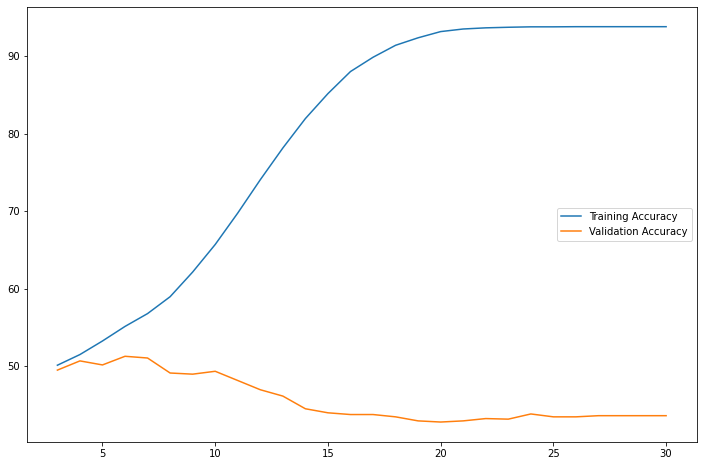

In [66]:
plt.figure(figsize=(12,8))
plt.plot(max_depth, training_accuracy,label = 'Training Accuracy')
plt.plot(max_depth, validation_accuracy,label = 'Validation Accuracy')
plt.legend(loc = 'center right')
plt.show()

In [ ]:
# Max Accuracy is obtained at depth = 6. Get Confusion Matrix for the same. 